<a href="https://colab.research.google.com/github/HongJeongHwan/Data_Preprocessing/blob/main/%EC%8B%A4%EC%8A%B506_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#§ 타이타닉 데이터 분석

##■ 함수 정리

###→ value_counts(normalize=True)

In [ ]:
# value_counts(normalize=True) : 항목별 비율 추출

# 필요한 라이브러리 임포트
import seaborn as sns
import pandas as pd

# 데이터 생성
df_tips = sns.load_dataset('tips')

# 결과 확인
print(df_tips)

# day 컬럼 : 항목별 개수 추출
day_counts = df_tips.loc[:,'day'].value_counts()
print(f'day컬럼의 항목별 빈도수 :\n{day_counts}\n')

# day 컬럼 : 항목별 비율 추출
day_ratio = df_tips.loc[:,'day'].value_counts(normalize=True)
print(f'day컬럼의 항목별 비율 :\n{day_ratio}\n')

df_tips.size
df_tips.size == 244*7

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
day컬럼의 항목별 빈도수 :
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

day컬럼의 항목별 비율 :
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64



True

###→ apply()

In [ ]:
# 사용자 정의 함수 --> 데이터프레임/시리즈 데이터에 적용
"""'
1. df.apply(func)
2. df.col.apply(func)
"""
# DataFrame 자료형 생성
data_ = {'A':[4,1,5],'B':[9,4,6]}
df = pd.DataFrame(data=data_)
print(f'{df}\n')

# plus_one 함수 정의 --> 사용자 정의 함수
def plus_one(x):
    return x+1

# 적용이 안되는 경우 --> pandas에서 제공하지 않는 함수를 df.함수() 사용
# df = df.plus_one()
# 이렇게 에러발생 : AttributeError: 'DataFrame' object has no attribute 'plus_one'

# plus_one(x) --> 매개변수x --> 인수(argument)로서 df 전달
# --> 함수의 성격에 따라 될수도 안될수도 있다. 숫자형:가능, 문자형이 들어가면 안됨.
# df_test = plus_one(df)
# print(df_test)

# DataFrame --> plus_one 함수 적용 --> df.apply(plus_one)
df_1 = df.apply(plus_one)
print(f'{df_1}\n')

# Series --> plus_one 함수 적용 --> df.col.apply(plus_one)
df.loc[:,'A'] = df.loc[:,'A'].apply(plus_one)
print(f'{df}\n')

'''
s_day = df_tips.loc[:,'day'].value_counts().apply(plus_one)
print(s_day)
'''

   A  B
0  4  9
1  1  4
2  5  6

   A   B
0  5  10
1  2   5
2  6   7

   A  B
0  5  9
1  2  4
2  6  6



"\ns_day = df_tips.loc[:,'day'].value_counts().apply(plus_one)\nprint(s_day)\n"

###→ apply(lambda)

In [ ]:
# apply(lambda)를 이용해서 plus_one 함수기능을 구현해보자.

# 사용할 데이터 --> df
print(f'{df}\n')

# DataFrame --> apply(lambda) 적용
df_2 = df.apply(lambda x:x+1)

print(f'{df_2}\n')

# 특정 컬럼 --> apply(lambda)
df.loc[:,'B'] = df.loc[:,'B'].apply(lambda x:x+1)

print(f'{df}\n')

   A  B
0  5  9
1  2  4
2  6  6

   A   B
0  6  10
1  3   5
2  7   7

   A   B
0  5  10
1  2   5
2  6   7



In [ ]:
# DataFrame 자료형 생성
data_ = {'A':['banna','apple'],'B':['i am a boy','you are a girl']}
df_str = pd.DataFrame(data=data_)
print(f'{df_str}\n')

# df_str

# def len_str(x):
#     return len(x)

df_test1 = df_str.apply(lambda x:len(x))
print(f'{df_test1}')

       A               B
0  banna      i am a boy
1  apple  you are a girl

A    2
B    2
dtype: int64


##■ 데이터 불러오기

In [ ]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 파일 경로 설정
test_file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/titanic_test.csv'
train_file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/titanic_train.csv'

# DataFrame 자료형 생성
df_titanic_test = pd.read_csv(test_file_path)
df_titanic_train = pd.read_csv(train_file_path)

# 결과 확인하기
print(df_titanic_test)
print(df_titanic_train)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Gender   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [ ]:
# 학습용 데이터와 평가용 데이터의 컬럼 비교
print(df_titanic_test.columns == df_titanic_train.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True]


In [ ]:
# 데이터 병합하기
# df_titanic = pd.concat([df_titanic_train,df_titanic_test], axis=0, join='inner', ignore_index=True)
df_titanic = pd.concat([df_titanic_train,df_titanic_test], axis=0)

# 인덱스 재설정 --> reset_index : ignore_index가 될때도 있고 안될때도 있으니 그냥하고 인덱스 재설정하자.
df_titanic.reset_index(drop=True, inplace=True)

# 결과 확인하기
print(f'{df_titanic}\n')
df_titanic

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 데이터의 전반적인 정보 확인
'''
## 컬럼 정보
Survived : 생존 여부
Pclass : Passenger Class, 승객 등급
Name : 승객 이름
Gender : 승객 성별(female:0, male:1) <-- 알파벳순
Age : 승객 나이
Sibsp : 탑승 한 형제/배우자 수
Parch : 탑승 한 부모/자녀 수
Ticket : 티켓 번호
Fare : 승객 지불 요금
Cabin : 선실 이름
Embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
'''
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


##■ 데이터 전처리

###→ 누락 데이터 처리

In [ ]:
# 각 컬럼별 누락 데이터 확인 --> isnull().sum()

# isnull() --> 각 컬럼별 데이터의 누락 여부를 확인
df_null = df_titanic.isnull()
print(f'{df_null}')

# 컬럼별 누락데이터의 수 확인
num_nulls = df_null.sum()
print(f'각 컬럼별 누락 데이터의 수 :\n{num_nulls}\n')

      PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  \
0           False     False   False  False   False  False  False  False   
1           False     False   False  False   False  False  False  False   
2           False     False   False  False   False  False  False  False   
3           False     False   False  False   False  False  False  False   
4           False     False   False  False   False  False  False  False   
...           ...       ...     ...    ...     ...    ...    ...    ...   
1304        False     False   False  False   False   True  False  False   
1305        False     False   False  False   False  False  False  False   
1306        False     False   False  False   False  False  False  False   
1307        False     False   False  False   False   True  False  False   
1308        False     False   False  False   False   True  False  False   

      Ticket   Fare  Cabin  Embarked  
0      False  False   True     False  
1      False  False  

####ㄴ Cabin 컬럼

In [ ]:
# Cabin 컬럼 제거 --> drop(columns=[col]) : 누락데이터가 너무 많고, 채우기가 힘들때는 제거
df_cleaned = df_titanic.drop(columns=['Cabin'])
# 결과 확인하기
print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

####ㄴ Age 컬럼

In [ ]:
# Age는 중요한 정보이기 때문에 삭제하면 안좋다.
# Age 컬럼 --> describe() --> 요약 통계량 구하기 : 평균, 중간값(50%)를 알 수 있다.
print(df_cleaned.Age.describe())

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


In [ ]:
# 나이별 빈도수 / 비율 구하기 --> value_counts(normalize=True)

# 출력되는 행의 수 --> 전체 행 출력
pd.options.display.max_rows=None

# 출력되는 행의 수 --> 상위 5, 하위 5개 출력(기본값)
pd.options.display.max_rows=10

# value_counts() 실행
counts = df_cleaned.Age.value_counts().head(10)
print(f'{counts}\n')

ratio = df_cleaned.Age.value_counts(normalize=True).head(10)
print(f'나이 컬럼의 나이별 비율 :\n{ratio}\n')

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
25.0    34
28.0    32
36.0    31
29.0    30
27.0    30
Name: Age, dtype: int64

나이 컬럼의 나이별 비율 :
24.0    0.044933
22.0    0.041109
21.0    0.039197
30.0    0.038241
18.0    0.037285
25.0    0.032505
28.0    0.030593
36.0    0.029637
29.0    0.028681
27.0    0.028681
Name: Age, dtype: float64



In [ ]:
# Age 컬럼 --> 누락 데이터 --> 중간값(median)으로 대체
age_m = df_cleaned.Age.median()
df_cleaned.loc[:,'Age'].fillna(age_m,inplace=True)

# 중간값으로 대체후 누락데이터의 수 확인
print(df_cleaned.Age.isnull().sum())

0


#####: Binning

In [ ]:
# Age 컬럼 --> 8단계 범주형 데이터로 변환

# pd.cut() --> 매개변수 설정
x = df_cleaned.loc[:,'Age']
bins = 8
labels=[0,1,2,3,4,5,6,7]

# 데이터 변환
df_cleaned.loc[:,'Age2'] = pd.cut(x=x,bins=bins,labels=labels)

# 결과 확인하기
print(f'전체 데이터 확인 :\n{df_cleaned}')

전체 데이터 확인 :
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                    

####ㄴEmbarked 컬럼

In [ ]:
# 승선 항구별 빈도수 / 비율

# 빈도수 추출
counts = df_cleaned.loc[:,'Embarked'].value_counts()
print(f'승선 항구별 빈도수 :\n{counts}\n')

# 비율 추출
ratio = df_cleaned.loc[:,'Embarked'].value_counts(normalize=True)
print(f'승선 항구별 비율 :\n{ratio}\n')

# 99.8%중의 70%의 확률로 S이므로, S로 채워도 괜찮을것.

승선 항구별 빈도수 :
S    914
C    270
Q    123
Name: Embarked, dtype: int64

승선 항구별 비율 :
S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64



In [ ]:
# 누락데이터 처리 --> 최빈값으로 채우기
df_cleaned.Embarked.fillna('S', inplace=True)

# 결과확인
num_nulls = df_cleaned.Embarked.isnull().sum()
print(f'누락데이터 처리후 Embarked 컬럼의 누락 데이터 수 = {num_nulls}\n')

누락데이터 처리후 Embarked 컬럼의 누락 데이터 수 = 0



####ㄴFare 컬럼

In [ ]:
# Fare 컬럼에서 누락 데이터 확인 --> 불리언배열 생성 --> loc 인덱서+불리언 인덱싱

# 누락여부 --> 불리언 배열
cond1 = df_cleaned.loc[:,'Fare'].isnull() == True

# 불리언 배열 --> loc 인덱서 + 불리언 인덱싱
null = df_cleaned.loc[cond1,:]
print(null)

      PassengerId  Survived  Pclass                Name Gender   Age  SibSp  \
1043         1044         0       3  Storey, Mr. Thomas   male  60.5      0   

      Parch Ticket  Fare Embarked Age2  
1043      0   3701   NaN        S    6  


In [ ]:
# 상관관계 분석
# df_cleaned.Pclass.value_counts()
# Pclass 컬럼은 순위형(순서가 의미를 가짐)이므로 연속형+순위형 상관관계계수(스피어만)을 사용
print(f'상관관계 분석 :\n{df_cleaned.corr(method="spearman")}\n')

상관관계 분석 :
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.020370 -0.039921  0.016007 -0.032295 -0.006191   
Survived       -0.020370  1.000000 -0.262977 -0.028978  0.108273  0.165864   
Pclass         -0.039921 -0.262977  1.000000 -0.345030 -0.066679 -0.028752   
Age             0.016007 -0.028978 -0.345030  1.000000 -0.102364 -0.182357   
SibSp          -0.032295  0.108273 -0.066679 -0.102364  1.000000  0.438373   
Parch          -0.006191  0.165864 -0.028752 -0.182357  0.438373  1.000000   
Fare           -0.003583  0.285094 -0.709019  0.173287  0.445566  0.400301   

                 Fare  
PassengerId -0.003583  
Survived     0.285094  
Pclass      -0.709019  
Age          0.173287  
SibSp        0.445566  
Parch        0.400301  
Fare         1.000000  



<ipython-input-25-87509314fb85>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'상관관계 분석 :\n{df_cleaned.corr(method="spearman")}\n')


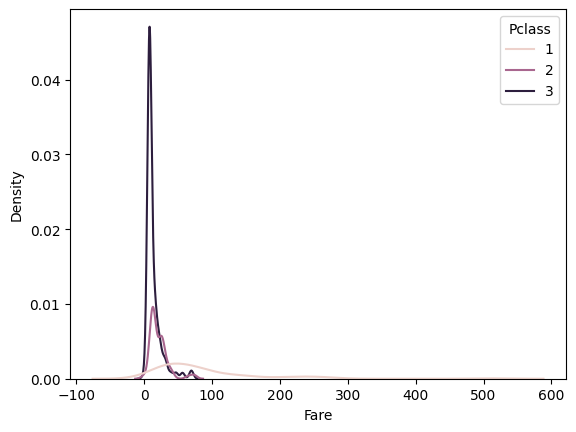

In [ ]:
# 승객 등급별 요금의 분포 시각화
sns.kdeplot(data=df_cleaned,x='Fare',hue='Pclass')
plt.show()

In [ ]:
# 3등석 승객의 요금 추출

# 행 : Pclass==3을 만족하는 행, 열 : 'Fare'
cond2 = (df_cleaned.loc[:,'Pclass'] == 3)
cond3 = (df_cleaned.loc[:,'Embarked'] == 'S')

s_Fare = df_cleaned.loc[cond2 & cond3, 'Fare'].value_counts()
s_Fare_ratio = df_cleaned.loc[cond2 & cond3, 'Fare'].value_counts(normalize=True)

# 요약 통계량 추출
print(f'3등석 요금의 요약통계량 : \n{s_Fare.describe()}\n')
print(f'3등석 요금 : \n{s_Fare}\n')
print(f'{s_Fare_ratio}\n')

3등석 요금의 요약통계량 : 
count    97.000000
mean      5.092784
std       8.433666
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      60.000000
Name: Fare, dtype: float64

3등석 요금 : 
8.0500     60
7.8958     43
7.7750     26
7.9250     23
7.8542     21
           ..
9.8417      1
10.1708     1
9.4833      1
8.3625      1
7.8792      1
Name: Fare, Length: 97, dtype: int64

8.0500     0.121457
7.8958     0.087045
7.7750     0.052632
7.9250     0.046559
7.8542     0.042510
             ...   
9.8417     0.002024
10.1708    0.002024
9.4833     0.002024
8.3625     0.002024
7.8792     0.002024
Name: Fare, Length: 97, dtype: float64



In [ ]:
# 3등급 요금의 중간값 추출
price = f'{df_cleaned.loc[cond2 & cond3, "Fare"].median():0.4f}'
print(price)
# df_cleaned.loc[df_cleaned.Fare.isnull(),:]
# df_cleaned.loc[df_cleaned.index == 1043,:]

8.0500


In [ ]:
# df_cleaned.Fare 컬럼에서 누락데이터 추가
df_cleaned.Fare.fillna(price,inplace=True)

# 결과 확인 --> index=1043 데이터 추출
cond4 = df_cleaned.index == 1043
data = df_cleaned.iloc[1043,:]
print(data)

PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Gender                       male
                      ...        
Parch                           0
Ticket                       3701
Fare                       8.0500
Embarked                        S
Age2                            6
Name: 1043, Length: 12, dtype: object


###→ Feature Engineering

#####ㄴ name 컬럼 세분화

In [ ]:
# name컬럼에서 호칭을 추출하는 방법
'''
# 이름의 구성 : 성, 호칭. 이름
'''
# name 컬럼의 값 확인하기
print(df_cleaned.Name)

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object


In [ ]:
# '호칭' 추출 --> split() 함수
"""
### split() 함수
1. 기본 기능 : 기준에 따라 문자열 분할(기준의 기본 설정 : 공백)
2. 문법 : 문자열.split('기준')
3, 예시)
   name = 'Braund, Mr. Owen Harris'
   name.split(',')
"""
# test_name = df_cleaned.loc[:,'Name'].iloc[0]
# print(test_name)

# print(test_name.split(', ')[1].split('. ')[0])

df_split = df_cleaned.loc[:,'Name'].str.split(', ').str[1].str.split('. ').str[0]
# print(df_split)

pd.options.display.max_rows=None
print(df_split.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
th            1
Jonkheer      1
Dona          1
Name: Name, dtype: int64


In [ ]:
# '호칭' 추출 --> split() 함수
"""
### split() 함수
1. 기본 기능 : 기준에 따라 문자열 분할(기준의 기본 설정 : 공백)
2. 문법 : 문자열.split('기준')
3, 예시)
   name = 'Braund, Mr. Owen Harris'
   name.split(',')
"""
test_name = df_cleaned.loc[:,'Name'].iloc[0]
print(test_name)

# 첫번째 분할 --> 기준
result1 = test_name.split(',')
print(f'첫번째 분할의 결과 : {result1}\n')

# '성'을 제외한 나머지 부분 추출 --> test_name.split(',')[1]
print(f'\'성\'을 제외한 나머지 부분 : {test_name.split(",")[1]}\n')

# 나머지 부분 --> '호칭' 추출
result2 = test_name.split(',')[1].split('.')
print(f'두번째 분할의 결과 : {result2}\n')

title = test_name.split(",")[1].split('.')[0]
print(f'추출한 호칭 확인 : {title}\n')

Braund, Mr. Owen Harris
첫번째 분할의 결과 : ['Braund', ' Mr. Owen Harris']

'성'을 제외한 나머지 부분 :  Mr. Owen Harris

두번째 분할의 결과 : [' Mr', ' Owen Harris']

추출한 호칭 확인 :  Mr



In [ ]:
# 문자열의 앞/뒤 공백 제거 --> split() 함수
"""
### strip() 함수
1. 기본 기능 : 문자열의 시작과 끝에 있는 공백과 줄바꿈 기호 제거
2. 예시)
   string = '\n Hello world, Python! \n"
   new_string = string.strip()
"""

# 예시에 대한 실습
str = '\n Hello world, Python! \n'
print(f'strip 함수 사용전 문자열 확인 : {str}')
print('-'*80)
result = str.strip()
print(f'strip 함수 사용 후 문자열 확인 : {result}')
print('-'*80)

strip 함수 사용전 문자열 확인 : 
 Hello world, Python! 

--------------------------------------------------------------------------------
strip 함수 사용 후 문자열 확인 : Hello world, Python!
--------------------------------------------------------------------------------


In [ ]:
# 추출된 호칭에 strip 함수 적용
result = title.strip()
print(result)

Mr


In [ ]:
# Name 컬럼의 호칭 추출함수 정의
def extract_title(name):
    #','로 split --> 두번째 성분원소 선택 --> '.'로 split --> 첫번째 성분원소 선택 --> strip
    title = name.split(',')[1].split('.')[0].strip()
    return title

In [ ]:
# Name 컬럼으로부터 호칭을 추출하여 새로운 컬럼 생성하기 --> 파생 변수 생성
'''
# 중간 호칭
  1) 'Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir' : 직위 표현
  2) 'Ms', 'Mme', 'Mrs', 'Dona' : 여성 표현
  3) 'Miss', 'Mlle', 'Lady' : 젊은 여성 표현
  4) 'Mr', 'Don' : 남성 표현
  5) 'Master' : 주로 청소년 이하 결혼하지 않은 남성
  6) 'Jonkheer', 'the Countess' : 귀족 표현
'''

# Name 컬럼 --> extract_title 적용 --> 새로운 컬럼 생성
# data = df_cleaned.Name.apply(extract_title)
data = df_cleaned.Name.apply(lambda name:name.split(',')[1].split('.')[0].strip())
# data = df_cleaned.Name.apply(lambda x:extract_title(x))
df_cleaned.loc[:,'title'] = data
pd.options.display.max_rows=10
print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

#####ㄴ title 컬럼 정리

In [ ]:
# title 컬럼의 항목별 개수 확인

# 빈도수 추출
print(f'빈도수 :\n{df_cleaned.title.value_counts()}\n')

# 비율 추출
print(f'비율 :\n{df_cleaned.title.value_counts(normalize=True)}\n')


빈도수 :
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
               ... 
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, Length: 18, dtype: int64

비율 :
Mr              0.578304
Miss            0.198625
Mrs             0.150497
Master          0.046600
Rev             0.006112
                  ...   
Don             0.000764
Capt            0.000764
the Countess    0.000764
Jonkheer        0.000764
Dona            0.000764
Name: title, Length: 18, dtype: float64



In [ ]:
# title 컬럼에서 (Mr or Miss or Mrs or Master)가 아닌 값 --> other로 변환
cond = ~((df_cleaned.loc[:,'title'] == 'Mr') |\
         (df_cleaned.loc[:,'title'] == 'Miss') |\
         (df_cleaned.loc[:,'title'] == 'Mrs') |\
         (df_cleaned.loc[:,'title'] == 'Master'))
df_cleaned.loc[cond,'title'] = 'other'

print(df_cleaned.title.value_counts())

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: title, dtype: int64


In [ ]:
# title 컬럼에서 (Mr or Miss or Mrs or Master)가 아닌 값 --> other로 변환
cond = (df_cleaned.loc[:,'title'] != 'Mr') &\
       (df_cleaned.loc[:,'title'] != 'Miss') &\
       (df_cleaned.loc[:,'title'] != 'Mrs') &\
       (df_cleaned.loc[:,'title'] != 'Master')
df_cleaned.loc[cond,'title'] = 'other'

print(f'컬럼의 항목별 빈도수 :\n{df_cleaned.title.value_counts()}\n')
print(f'컬럼의 항목별 비율 :\n{df_cleaned.title.value_counts(normalize=True)}\n')


컬럼의 항목별 빈도수 :
Mr       757
Miss     260
Mrs      197
other     95
Name: title, dtype: int64

컬럼의 항목별 비율 :
Mr       0.578304
Miss     0.198625
Mrs      0.150497
other    0.072574
Name: title, dtype: float64



In [ ]:
def chg_title1(name):
    if name=='Mr':
        title = name
    elif name=='Miss':
        title = name
    elif name=='Mrs':
        title = name
    elif name=='Master':
        title = name
    else:
        title = 'other'
    return title

# chg_title1('other')

# df_cleaned.title2 = df_cleaned.title2.apply(chg_title1)
df_cleaned.loc[:,'title'] = df_cleaned.title.apply(chg_title1)
print(df_cleaned.title.value_counts())

Mr       757
Miss     260
Mrs      197
other     95
Name: title, dtype: int64


In [ ]:
def chg_title2(name):
    if name=='Mr' or name=='Miss' or name=='Mrs' or name=='Master':
        title = name
    else:
        title = 'other'
    return title

# chg_title1('other')

# df_cleaned.title2 = df_cleaned.title2.apply(chg_title1)
df_cleaned.loc[:,'title'] = df_cleaned.title.apply(chg_title2)
print(df_cleaned.title.value_counts())

Mr       757
Miss     260
Mrs      197
other     95
Name: title, dtype: int64


In [ ]:
# Mr + Mrs + Miss + Master = 총합 추출
sum = df_cleaned.title.value_counts().iloc[0] +\
      df_cleaned.title.value_counts().iloc[1] +\
      df_cleaned.title.value_counts().iloc[2] +\
      df_cleaned.title.value_counts().iloc[3]

total_length = df_cleaned.title.size

# df_cleaned.title
# print(df_cleaned.title.value_counts())
# print(sum)
# print(total_length)

# print(total_length-sum)
# print(f'{df_cleaned.title.str.len()}')

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305     other
1306        Mr
1307        Mr
1308    Master
Name: title, Length: 1309, dtype: object

In [ ]:
df_cleaned.title.value_counts()[3]

95

#####ㄴ 동반한 가족인원수 컬럼 추가

In [ ]:
# SibSp 컬럼 값과 Parch 컬럼 값을 합 --> 가족 인원수 컬럼 생성
df_cleaned.loc[:,'num_family'] = df_cleaned.SibSp + df_cleaned.Parch

# print(df_cleaned.loc[:,['SibSp','Parch','num_family']])
# df_cleaned.Family.del
df_cleaned.loc[:,'num_family'].value_counts()
df_cleaned.loc[:,'num_family'].value_counts(normalize=True)

0     0.603514
1     0.179526
2     0.121467
3     0.032850
5     0.019099
4     0.016807
6     0.012223
10    0.008403
7     0.006112
Name: num_family, dtype: float64

In [ ]:
# print(df_cleaned)
# df_cleaned.drop('Family',axis=1, inplace=True)
# print(df_cleaned)

#####ㄴ 혼자 승선했는지 여부 확인

In [ ]:
cond = (df_cleaned.num_family == 0)
df_cleaned.loc[~cond,'alone'] = 0
df_cleaned.loc[cond,'alone'] = 1

print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
cond1 = (df_cleaned.num_family == 0)
df_cleaned.loc[cond1,'alone'] = 1

cond2 = (df_cleaned.num_family > 0)
df_cleaned.loc[cond2,'alone'] = 0

print(df_cleaned)
# df_cleaned.info()

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
cond1 = (df_cleaned.num_family == 0)
df_cleaned.loc[cond1,'alone'] = 1

cond2 = (df_cleaned.num_family != 0)
df_cleaned.loc[cond2,'alone'] = 0

print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
cond1 = (df_cleaned.num_family == 0)
df_cleaned.loc[cond1,'alone1'] = 1

df_cleaned.loc[:,'alone1'].fillna(0,inplace=True)

print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
cond1 = (df_cleaned.num_family == '0')
df_cleaned.loc[cond1,'alone2'] = 1

df_cleaned.loc[:,'alone2'].fillna(0,inplace=True)

print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Gender       1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   object  
 10  Embarked     1309 non-null   object  
 11  Age2         1309 non-null   category
 12  title        1309 non-null   object  
 13  num_family   1309 non-null   int64   
 14  alone        1309 non-null   float64 
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 144.9+ KB


#####ㄴ 불필요한 컬럼 삭제

In [ ]:
# 삭제의 대상 : PassengerId, Name, Age, Ticket, Title, title2, title3, title4, alone1
# df_cleaned.drop(columns=['PassengerId', 'Name', 'Age', 'Ticket', 'title', 'title2', 'title3', 'title4', 'alone1'],
#                 inplace=True)

# df_cleaned.rename(columns={'title1':'title','Age2':'Age'},inplace=True)
# print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

###→ Label Encoding

In [ ]:
# pd.get_dummies를 사용하면 되지만 수동으로 진행해본다.
# 대상 컬럼 : df.info() --> 기본정보 추출
df_cleaned.info()
# Gender, Embarked, title

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   int64   
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Gender       1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   object  
 10  Embarked     1309 non-null   object  
 11  Age2         1309 non-null   category
 12  title        1309 non-null   object  
 13  num_family   1309 non-null   int64   
 14  alone        1309 non-null   float64 
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 144.9+ KB


In [ ]:
# 비교 : pd.get_dummies()
df_onehot = pd.get_dummies(data=df_cleaned, columns=['Gender','Embarked','title'])

# 결과 확인
print(df_onehot)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name   Age  SibSp  Parch  \
0                               Braund, Mr. Owen Harris  22.0      1      0   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                                Heikkinen, Miss. Laina  26.0      0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                              Allen, Mr. William Henry  35.0      0      0   
...                                                 ...  

In [ ]:
# # 문자열 컬럼 --> '항목' 확인 --> np.unique(array) : 알파벳 순으로 정렬

# # Gender 컬럼 항목
print(f'{np.unique(ar=df_cleaned.Gender, return_counts=True)}\n')

# # Embarked 컬럼
print(f'{np.unique(ar=df_cleaned.Embarked, return_counts=True)}\n')

# # title 컬럼
print(f'{np.unique(ar=df_cleaned.title)}\n')

# sorted(df_cleaned.title.value_counts().index)
# df_cleaned.drop(columns='title', inplace=True)
# df_cleaned.rename(columns={'title4':'title'},inplace=True)
# df_cleaned.title.value_counts()
df_cleaned.Gender.value_counts()


(array(['female', 'male'], dtype=object), array([466, 843]))

(array(['C', 'Q', 'S'], dtype=object), array([270, 123, 916]))

['Master' 'Miss' 'Mr' 'Mrs' 'other']



male      843
female    466
Name: Gender, dtype: int64

In [ ]:
# replace() 함수 사용
df_cleaned.replace({'female':0,'male':1,
                    'C':0,'Q':1,'S':2,
                    'Master':0,'Miss':1,'Mr':2,'Mrs':3,'other':4},
                   inplace=True)

# 결과 확인
print(df_cleaned)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris       1  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...       0  38.0      1   
2                                Heikkinen, Miss. Laina       0  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)       0  35.0      1   
4                              Allen, Mr. William Henry       1  35.0      0   
...                                                

###→ 결과 저장하기

In [ ]:
# 전처리한 결과를 csv 파일로 저장하기

# 저장경로 설정하기
file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/titanic_preprocessed.csv'

# df.to_csv()
df_cleaned.to_csv(file_path,index=False)

##■ 데이터 탐색

###→ EDA(탐색적 데이터 분석)

#####ㄴ Survived 컬럼

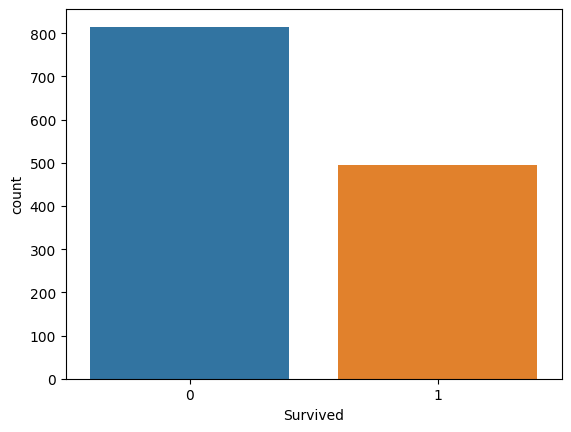

In [ ]:
# 사망자 수 / 생존자 수 분포 시각화
sns.countplot(data=df_cleaned, x='Survived')
plt.show()

In [ ]:
# 사망자 수 / 생존자 수 --> 숫자 확인(추출)

# 항목별 빈도수 추출 --> 변수.value_counts()
print(f'사망자 수 / 생존자 수 확인 :\n{df_cleaned.Survived.value_counts()}\n')
print(f'사망자 수 / 생존자 비율 확인 :\n{df_cleaned.Survived.value_counts(normalize=True)}\n')
# 분석의 핵심 : 사망자 수가 훨씬 많음 --> 불균형한 데이터임을 확인

사망자 수 / 생존자 수 확인 :
0    815
1    494
Name: Survived, dtype: int64

사망자 수 / 생존자 비율 확인 :
0    0.622613
1    0.377387
Name: Survived, dtype: float64



#####ㄴ 생존여부와 승객의 등급 분석

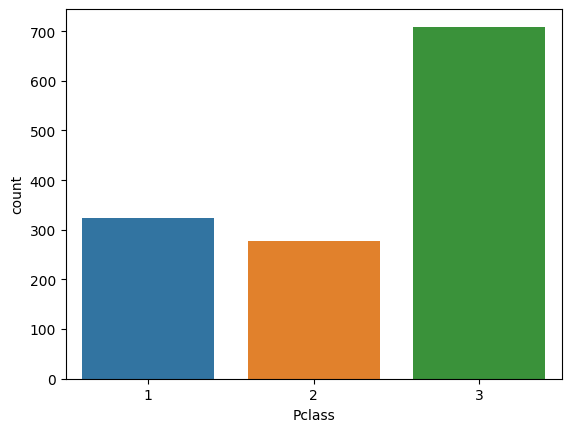

승객의 등급 비율 :
3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64



In [ ]:
# 탑승객의 등급 분석

# 시각화  --> 항목별 빈도수
sns.countplot(data=df_cleaned,x='Pclass')
plt.show()

# 승객의 등급 비율 추출 --> Series.value_counts(normalize=True)
# df_cleaned.Pclass.value_counts()
pclass_ratio = df_cleaned.Pclass.value_counts(normalize=True)
print(f'승객의 등급 비율 :\n{pclass_ratio}\n')

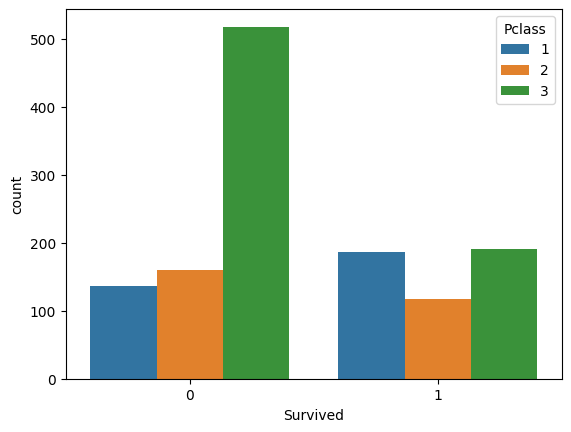

In [ ]:
# Survived 컬럼과 Pclass 컬럼의 관계 분석(1)
sns.countplot(data=df_cleaned, x='Survived', hue='Pclass')
plt.show()

In [ ]:
# 생존자 / 사망자의 승객 등급 분석

# 사망자의 승객등급 비율 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
cond1 = df_cleaned.loc[:,'Survived'] == 0
print(f'사망자 중 승객등급비율 추출 : \n{df_cleaned.loc[cond1,"Pclass"].value_counts(normalize=True)}\n')

# 생존자의 승객등급 비율 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
cond2 = df_cleaned.loc[:,'Survived'] == 1
print(f'생존자 중 승객등급비율 추출 : \n{df_cleaned.loc[cond2,"Pclass"].value_counts(normalize=True)}\n')

사망자 중 승객등급비율 추출 : 
3    0.635583
2    0.196319
1    0.168098
Name: Pclass, dtype: float64

생존자 중 승객등급비율 추출 : 
3    0.386640
1    0.376518
2    0.236842
Name: Pclass, dtype: float64



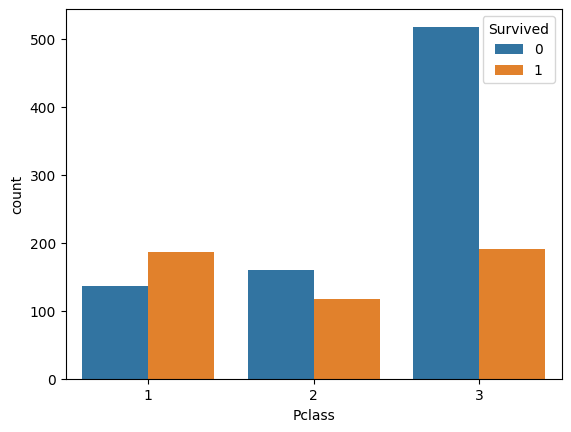

In [ ]:
# Survived 컬럼과 Pclass 컬럼의 관계 분석(2)
sns.countplot(data=df_cleaned, x='Pclass', hue='Survived')
plt.show()

In [ ]:
# 승객 등급별 생존자 / 사망자의 빈도수와 비율 분석

# 1등급 승객중 사망자의 빈도수 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
cond1 = df_cleaned.loc[:,'Pclass'] == 1
print(f'1등급 승객중 사망자 / 생존자 빈도수 추출 : \n{df_cleaned.loc[cond1,"Survived"].value_counts(ascending=True)}\n')
# 1등급 승객중 사망자의 비율 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
print(f'1등급 승객중 사망자 / 생존자 비율 추출 : \n{df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True,ascending=True)}\n')

# 생존자의 승객등급 빈도수 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
cond2 = df_cleaned.loc[:,'Pclass'] == 2
print(f'2등급 승객중 사망자 / 생존자 빈도수 추출 : \n{df_cleaned.loc[cond2,"Survived"].value_counts()}\n')
# 생존자의 승객등급 비율 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
print(f'2등급 승객중 사망자 / 생존자 비율 추출 : \n{df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True)}\n')

# 생존자의 승객등급 빈도수 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
cond3 = df_cleaned.loc[:,'Pclass'] == 3
print(f'3등급 승객중 사망자 / 생존자 빈도수  추출 : \n{df_cleaned.loc[cond3,"Survived"].value_counts()}\n')
# 생존자의 승객등급 비율 추출 --> 비교연산자 --> 불리언 배열 생성 --> loc인덱서+불리언배열
print(f'3등급 승객중 사망자 / 생존자 비율  추출 : \n{df_cleaned.loc[cond3,"Survived"].value_counts(normalize=True)}\n')

1등급 승객중 사망자 / 생존자 빈도수 추출 : 
0    137
1    186
Name: Survived, dtype: int64

1등급 승객중 사망자 / 생존자 비율 추출 : 
0    0.424149
1    0.575851
Name: Survived, dtype: float64

2등급 승객중 사망자 / 생존자 빈도수 추출 : 
0    160
1    117
Name: Survived, dtype: int64

2등급 승객중 사망자 / 생존자 비율 추출 : 
0    0.577617
1    0.422383
Name: Survived, dtype: float64

3등급 승객중 사망자 / 생존자 빈도수  추출 : 
0    518
1    191
Name: Survived, dtype: int64

3등급 승객중 사망자 / 생존자 비율  추출 : 
0    0.730606
1    0.269394
Name: Survived, dtype: float64



In [ ]:
# 등급별 사망자 / 생존자 비율 --> 데이터프레임 생성(1)
df_survived = pd.concat([df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True,ascending=True),
                         df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True),
                         df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True)],
                        keys=['1등석','2등석','3등석'],
                        names=['생존여부'],
                        # index=['사망자','생존자'],
                        axis=1)

# 인덱스 / 컬럼이름 수정
df_survived.columns = ['1등석','2등석','3등석']
df_survived.index = ['사망자','생존자']

df_survived

,1등석,2등석,3등석
사망자,0.424149,0.577617,0.577617
생존자,0.575851,0.422383,0.422383


In [ ]:
# 등급별 사망자 / 생존자 비율 --> 데이터프레임 생성(2)
data_ = {'1등석':df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True,ascending=True).values,
        '2등석':df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True).values,
        '3등석':df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True).values}
index_ = ['사망자 비율','생존자 비율']
df_survived1 = pd.DataFrame(data=data_,index=index_)
df_survived1

,1등석,2등석,3등석
사망자 비율,0.424149,0.577617,0.577617
생존자 비율,0.575851,0.422383,0.422383


In [ ]:
# 등급별 사망자 / 생존자 비율 --> 데이터프레임 생성(3)
data_ = [df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True,ascending=True).values,
         df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True).values,
         df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True).values]
index_ = ['1등석','2등석','3등석']
columns_ = ['사망자 비율','생존자 비율']
df_survived2 = pd.DataFrame(data=data_,index=index_,columns=columns_)
df_survived2

,사망자 비율,생존자 비율
1등석,0.424149,0.575851
2등석,0.577617,0.422383
3등석,0.577617,0.422383


####ㄴ 생존여부와 성별의 관계 분석

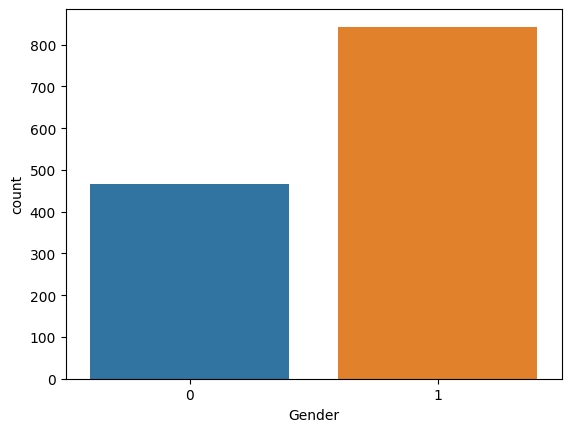

Gender 컬럼의 남여 빈도수 :
1    843
0    466
Name: Gender, dtype: int64

Gender 컬럼의 남여 비율 :
1    0.644003
0    0.355997
Name: Gender, dtype: float64



In [ ]:
# 전체 탑승객 중 남여의 빈도수 분석

# 시각화
sns.countplot(data=df_cleaned,x='Gender')
plt.show()

# 통계 분석
print(f'Gender 컬럼의 남여 빈도수 :\n{df_cleaned.loc[:,"Gender"].value_counts()}\n')
print(f'Gender 컬럼의 남여 비율 :\n{df_cleaned.loc[:,"Gender"].value_counts(normalize=True)}\n')

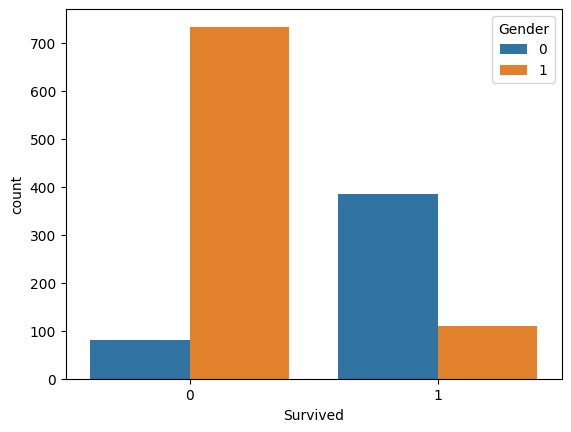

,사망자 빈도수,사망자 비율,생존자 빈도수,생존자 비율
여성,81,0.099387,385,0.779352
남성,734,0.900613,109,0.220648


In [ ]:
# Survived 컬럼과 Gender 컬럼의 관계(1)

# 시각화
sns.countplot(data=df_cleaned,x='Survived', hue='Gender')
plt.show()

# 생존자 / 사망자의 성별 분석
cond = df_cleaned.loc[:,'Survived'] == 0
# print(f'사망자중 여성/남성의 빈도수 :\n{df_cleaned.loc[cond,"Gender"].value_counts()}\n')
# print(f'사망자중 여성/남성의 비율 :\n{df_cleaned.loc[cond,"Gender"].value_counts(normalize=True)}\n')
# print(f'생존자중 여성/남성의 빈도수 :\n{df_cleaned.loc[~cond,"Gender"].value_counts()}\n')
# print(f'생존자중 여성/남성의 비율 :\n{df_cleaned.loc[~cond,"Gender"].value_counts(normalize=True)}\n')

df_SG = pd.concat([df_cleaned.loc[cond,"Gender"].value_counts(ascending=True),
                   df_cleaned.loc[cond,"Gender"].value_counts(normalize=True,ascending=True),
                   df_cleaned.loc[~cond,"Gender"].value_counts(ascending=True),
                   df_cleaned.loc[~cond,"Gender"].value_counts(normalize=True,ascending=True)],
                  axis=1)
df_SG.columns = ['사망자 빈도수','사망자 비율','생존자 빈도수','생존자 비율']
df_SG.index = ['여성','남성']

df_SG

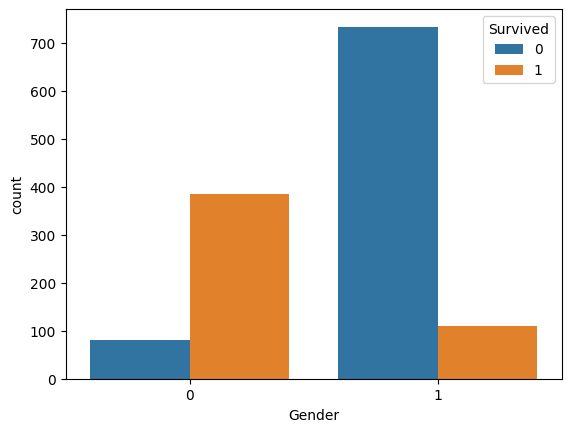

,여성 빈도수,여성 비율,남성 빈도수,남성 비율
사망자,81,0.17382,734,0.8707
생존자,385,0.82618,109,0.1293


In [ ]:
# Survived 컬럼과 Gender 컬럼의 관계(2)

# 시각화
sns.countplot(data=df_cleaned,x='Gender', hue='Survived')
plt.show()

# 생존자 / 사망자의 성별 분석
cond = df_cleaned.loc[:,'Gender'] == 0  # <-- female(0), male(1)
# print(f'여성중 생존자/사망자의 비율 :\n{df_cleaned.loc[cond,"Survived"].value_counts()}\n')
# print(f'여성중 생존자/사망자의 비율 :\n{df_cleaned.loc[cond,"Survived"].value_counts(normalize=True)}\n')
# print(f'남성중 생존자/사망자의 비율 :\n{df_cleaned.loc[~cond,"Survived"].value_counts()}\n')
# print(f'남성중 생존자/사망자의 비율 :\n{df_cleaned.loc[~cond,"Survived"].value_counts(normalize=True)}\n')

df_GS = pd.concat([df_cleaned.loc[cond,"Survived"].value_counts(ascending=True),
                   df_cleaned.loc[cond,"Survived"].value_counts(normalize=True,ascending=True),
                   df_cleaned.loc[~cond,"Survived"].value_counts(),
                   df_cleaned.loc[~cond,"Survived"].value_counts(normalize=True)],
                  axis =1)
df_GS.columns = ['여성 빈도수','여성 비율','남성 빈도수','남성 비율']
df_GS.index = ['사망자','생존자']
df_GS

####ㄴ 생존여부와 연령의 관계 분석

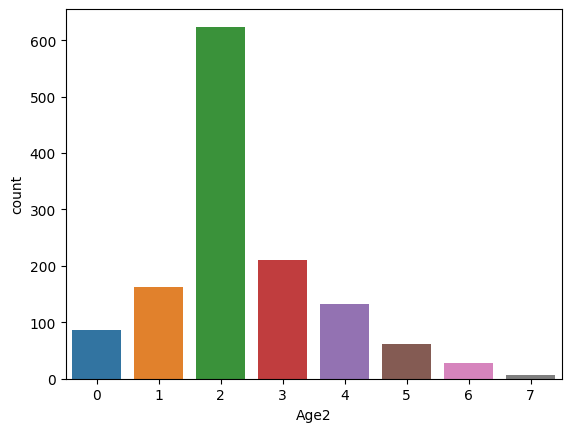

In [ ]:
# 탑승객의 연령 분석
# df_cleaned.Age2.value_counts()
sns.countplot(data=df_cleaned,x='Age2')
plt.show()

In [ ]:
# 탑승객의 연령 분석

# 탑승객의 연령별 빈도수 추출
print(f'탑승객의 연령별 빈도수 :\n{df_cleaned.Age2.value_counts(ascending=True)}\n')
print(f'탑승객의 연령별 비율 :\n{df_cleaned.Age2.value_counts(normalize=True,ascending=True)}\n')

df_Age3 = pd.concat([df_cleaned.Age2.value_counts(ascending=True),
                     df_cleaned.Age2.value_counts(normalize=True,ascending=True)],
                    axis=1)
df_Age3.columns = ['탑승객의 연령별 빈도수','탑승객의 연령별 비율']

df_Age3

In [ ]:
# Survived 컬럼과 Age2 컬럼과의 관계 분석(1)

sns.countplot(data=df_cleaned,x='Survived',hue='Age2')
plt.show()

In [ ]:
# Survived 컬럼과 Age2 컬럼과의 관계 분석(1)

# 대상 : 사망자
cond = df_cleaned.loc[:,'Survived'] == 0
# 사망자의 연령별 빈도수 추출
print(f'사망자의 연령별 빈도수 추출 :\n{df_cleaned.loc[cond,"Age2"].value_counts()}\n')
# 사망자의 연령별 비율 추출
print(f'사망자의 연령별 비율 추출 :\n{df_cleaned.loc[cond,"Age2"].value_counts(normalize=True)}\n')
# 대상 : 생존자

# 생존자의 연령별 빈도수 추출
print(f'생존자의 연령별 빈도수 추출 :\n{df_cleaned.loc[~cond,"Age2"].value_counts()}\n')
# 생존자의 연령별 비율 추출
print(f'생존자의 연령별 비율 추출 :\n{df_cleaned.loc[~cond,"Age2"].value_counts(normalize=True)}\n')

In [ ]:
# Survived 컬럼과 Age2 컬럼과의 관계 분석(2)
sns.countplot(data=df_cleaned,x='Age2',hue='Survived')
plt.show()

# # 대상 : 사망자
# cond = df_cleaned.loc[:,'Survived'] == 0
# # 사망자의 연령별 빈도수 추출
# print(f'사망자의 연령별 빈도수 추출 :\n{df_cleaned.loc[cond,"Age2"].value_counts()}\n')
# # 사망자의 연령별 비율 추출
# print(f'사망자의 연령별 비율 추출 :\n{df_cleaned.loc[cond,"Age2"].value_counts(normalize=True)}\n')
# # 대상 : 생존자

# # 생존자의 연령별 빈도수 추출
# print(f'생존자의 연령별 빈도수 추출 :\n{df_cleaned.loc[~cond,"Age2"].value_counts()}\n')
# # 생존자의 연령별 비율 추출
# print(f'생존자의 연령별 비율 추출 :\n{df_cleaned.loc[~cond,"Age2"].value_counts(normalize=True)}\n')

#####: 10,20,30대의 생존여부 추가분석

In [ ]:
# 전체 탑승객 중 사망자 / 생존자 비율 --> 62.3% : 37.7%

# 대상 : 20대
cond2 = df_cleaned.loc[:,'Age2']==2
# # 20대중 사망자 / 생존자 빈도수 추출
# print(f'20대중 사망자 / 생존자 빈도수 추출 :\n{df_cleaned.loc[cond2,"Survived"].value_counts()}\n')
# # 20대중 사망자 / 생존자 비율 추출
# print(f'20대중 사망자 / 생존자 빈도수 추출 :\n{df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True)}\n')

# 대상 : 30대
cond3 = df_cleaned.loc[:,'Age2']==3
# # 30대중 사망자 / 생존자 빈도수 추출
# print(f'30대중 사망자 / 생존자 빈도수 추출 :\n{df_cleaned.loc[cond3,"Survived"].value_counts()}\n')
# # 30대중 사망자 / 생존자 비율 추출
# print(f'30대중 사망자 / 생존자 빈도수 추출 :\n{df_cleaned.loc[cond3,"Survived"].value_counts(normalize=True)}\n')

# 대상 : 10대
cond1 = df_cleaned.loc[:,'Age2']==1
# # 10대중 사망자 / 생존자 빈도수 추출
# print(f'10대중 사망자 / 생존자 빈도수 추출 :\n{df_cleaned.loc[cond1,"Survived"].value_counts()}\n')
# # 10대중 사망자 / 생존자 비율 추출
# print(f'10대중 사망자 / 생존자 빈도수 추출 :\n{df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True)}\n')

df_123Age = pd.concat([df_cleaned.loc[cond1,"Survived"].value_counts(),
                       df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True),
                       df_cleaned.loc[cond2,"Survived"].value_counts(),
                       df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True),
                       df_cleaned.loc[cond3,"Survived"].value_counts(),
                       df_cleaned.loc[cond3,"Survived"].value_counts(normalize=True)],
                      axis=1)

df_123Age.columns = ['10대 빈도수','10대 비율','20대 빈도수','20대 비율','30대 빈도수','30대 비율']
df_123Age.index = ['사망자','생존자']

df_123Age

####ㄴ 성별과 연령의 관계 분석

In [ ]:
# Gender 컬럼과 Age2 컬럼의 관계 확인(1)
sns.countplot(data=df_cleaned,x='Gender',hue='Age2')
plt.show()

# 남여의 연령 분석

# 대상 : 여성
cond = df_cleaned.loc[:,'Gender'] == 0
# 여성의 연령별 빈도수 추출
print(f'여성의 연령별 빈도수 추출 :\n{df_cleaned.loc[cond,"Age2"].value_counts()}\n')
# 여성의 연령별 비율 추출
print(f'여성의 연령별 비율 추출 :\n{df_cleaned.loc[cond,"Age2"].value_counts(normalize=True)}\n')

# 대상 : 남성
# 남성의 연령별 빈도수 추출
print(f'여성의 연령별 빈도수 추출 :\n{df_cleaned.loc[~cond,"Age2"].value_counts()}\n')
# 남성의 연령별 비율 추출
print(f'여성의 연령별 비율 추출 :\n{df_cleaned.loc[~cond,"Age2"].value_counts(normalize=True)}\n')

In [ ]:
# Gender 컬럼과 Age2 컬럼의 관계 확인(2)
sns.countplot(data=df_cleaned,x='Age2',hue='Gender')
plt.show()

### 10,20,30대의 성별 분석

# # 대상 : 10대
# cond1 = df_cleaned.loc[:,'Age2'] == 1
# # 여성의 연령별 빈도수 추출
# print(f'10대중 남녀의 빈도수 추출 :\n{df_cleaned.loc[cond1,"Gender"].value_counts()}\n')
# # 여성의 연령별 비율 추출
# print(f'10대중 남녀의 비율 추출 :\n{df_cleaned.loc[cond1,"Gender"].value_counts(normalize=True)}\n')

# # 대상 : 20대
# cond2 = df_cleaned.loc[:,'Age2'] == 2
# # 여성의 연령별 빈도수 추출
# print(f'20대중 남녀의 빈도수 추출 :\n{df_cleaned.loc[cond2,"Gender"].value_counts()}\n')
# # 여성의 연령별 비율 추출
# print(f'20대중 남녀의 비율 추출 :\n{df_cleaned.loc[cond2,"Gender"].value_counts(normalize=True)}\n')

# # 대상 : 30대
# cond3 = df_cleaned.loc[:,'Age2'] == 3
# # 여성의 연령별 빈도수 추출
# print(f'30대중 남녀의 빈도수 추출 :\n{df_cleaned.loc[cond3,"Gender"].value_counts()}\n')
# # 여성의 연령별 비율 추출
# print(f'30대중 남녀의 비율 추출 :\n{df_cleaned.loc[cond3,"Gender"].value_counts(normalize=True)}\n')

df_123Age2 = pd.concat([df_cleaned.loc[cond1,"Gender"].value_counts(),
                        df_cleaned.loc[cond1,"Gender"].value_counts(normalize=True),
                        df_cleaned.loc[cond2,"Gender"].value_counts(),
                        df_cleaned.loc[cond2,"Gender"].value_counts(normalize=True),
                        df_cleaned.loc[cond3,"Gender"].value_counts(),
                        df_cleaned.loc[cond3,"Gender"].value_counts(normalize=True)],
                       axis=1)
df_123Age2.columns = ['10대 빈도수','10대 비율','20대 빈도수','20대 비율','30대 빈도수','30대 비율']
df_123Age2.index = ['생존자','사망자']
df_123Age2

In [ ]:
# # 10대 & 남성 --> 생존자 / 사망자 빈도수 추출
# cond1_10 = (df_cleaned.loc[:,'Age2']==1) & (df_cleaned.loc[:,'Gender']==1)
# print(f'10대 & 남성 --> 생존자 / 사망자 빈도수 추출 :\n{df_cleaned.loc[cond1_10,"Survived"].value_counts(ascending=True)}\n')
# # 10대 & 남성 --> 생존자 / 사망자 비율 추출
# print(f'10대 & 남성 --> 생존자 / 사망자 비율 추출 :\n{df_cleaned.loc[cond1_10,"Survived"].value_counts(normalize=True,ascending=True)}\n')

# # 10대 & 여성 --> 생존자 / 사망자 빈도수 추출
# cond2_10 = (df_cleaned.loc[:,'Age2']==1) & (df_cleaned.loc[:,'Gender']==0)
# print(f'10대 & 여성 --> 생존자 / 사망자 빈도수 추출 :\n{df_cleaned.loc[cond2_10,"Survived"].value_counts()}\n')
# # 10대 & 남성 --> 생존자 / 사망자 비율 추출
# print(f'10대 & 여성 --> 생존자 / 사망자 비율 추출 :\n{df_cleaned.loc[cond2_10,"Survived"].value_counts(normalize=True)}\n')

df_10Age = pd.concat([df_cleaned.loc[cond1_10,"Survived"].value_counts(ascending=True),
                      df_cleaned.loc[cond1_10,"Survived"].value_counts(normalize=True,ascending=True),
                      df_cleaned.loc[cond2_10,"Survived"].value_counts(),
                      df_cleaned.loc[cond2_10,"Survived"].value_counts(normalize=True)],
                     axis=1)
df_10Age.columns = ['10대남성 빈도수','10대남성 비율','10대여성 빈도수','10대여성 비율']
df_10Age.index = ['생존자','사망자']
df_10Age

In [ ]:
# # 20대 & 남성 --> 생존자 / 사망자 빈도수 추출
# cond1_20 = (df_cleaned.loc[:,'Age2']==2) & (df_cleaned.loc[:,'Gender']==1)
# print(f'20대 & 남성 --> 생존자 / 사망자 빈도수 추출 :\n{df_cleaned.loc[cond1_20,"Survived"].value_counts(ascending=True)}\n')
# # 20대 & 남성 --> 생존자 / 사망자 비율 추출
# print(f'20대 & 남성 --> 생존자 / 사망자 비율 추출 :\n{df_cleaned.loc[cond1_20,"Survived"].value_counts(normalize=True,ascending=True)}\n')

# # 20대 & 여성 --> 생존자 / 사망자 빈도수 추출
# cond2_20 = (df_cleaned.loc[:,'Age2']==2) & (df_cleaned.loc[:,'Gender']==0)
# print(f'20대 & 여성 --> 생존자 / 사망자 빈도수 추출 :\n{df_cleaned.loc[cond2_20,"Survived"].value_counts()}\n')
# # 20대 & 남성 --> 생존자 / 사망자 비율 추출
# print(f'20대 & 여성 --> 생존자 / 사망자 비율 추출 :\n{df_cleaned.loc[cond2_20,"Survived"].value_counts(normalize=True)}\n')

df_20Age = pd.concat([df_cleaned.loc[cond1_20,"Survived"].value_counts(ascending=True),
                      df_cleaned.loc[cond1_20,"Survived"].value_counts(normalize=True,ascending=True),
                      df_cleaned.loc[cond2_20,"Survived"].value_counts(),
                      df_cleaned.loc[cond2_20,"Survived"].value_counts(normalize=True)],
                     axis=1)
df_20Age.columns = ['20대남성 빈도수','20대남성 비율','20대여성 빈도수','20대여성 비율']
df_20Age.index = ['생존자','사망자']
df_20Age

In [ ]:
# # 30대 & 남성 --> 생존자 / 사망자 빈도수 추출
# cond1_30 = (df_cleaned.loc[:,'Age2']==3) & (df_cleaned.loc[:,'Gender']==1)
# print(f'30대 & 남성 --> 생존자 / 사망자 빈도수 추출 :\n{df_cleaned.loc[cond1_30,"Survived"].value_counts(ascending=True)}\n')
# # 30대 & 남성 --> 생존자 / 사망자 비율 추출
# print(f'30대 & 남성 --> 생존자 / 사망자 비율 추출 :\n{df_cleaned.loc[cond1_30,"Survived"].value_counts(normalize=True,ascending=True)}\n')

# # 30대 & 여성 --> 생존자 / 사망자 빈도수 추출
# cond2_30 = (df_cleaned.loc[:,'Age2']==3) & (df_cleaned.loc[:,'Gender']==0)
# print(f'30대 & 여성 --> 생존자 / 사망자 빈도수 추출 :\n{df_cleaned.loc[cond2_30,"Survived"].value_counts()}\n')
# # 20대 & 남성 --> 생존자 / 사망자 비율 추출
# print(f'30대 & 여성 --> 생존자 / 사망자 비율 추출 :\n{df_cleaned.loc[cond2_30,"Survived"].value_counts(normalize=True)}\n')

df_30Age = pd.concat([df_cleaned.loc[cond1_30,"Survived"].value_counts(ascending=True),
                      df_cleaned.loc[cond1_30,"Survived"].value_counts(normalize=True,ascending=True),
                      df_cleaned.loc[cond2_30,"Survived"].value_counts(),
                      df_cleaned.loc[cond2_30,"Survived"].value_counts(normalize=True)],
                     axis=1)
df_30Age.columns = ['30대남성 빈도수','30대남성 비율','30대여성 빈도수','30대여성 비율']
df_30Age.index = ['생존자','사망자']
df_30Age

####ㄴ 승객의 등급과 연령의 관계 분석

In [ ]:
# 승객의 등급(Pclass) 컬럼과 Age2 컬럼의 관계 확인
sns.countplot(data=df_cleaned,x='Pclass',hue='Age2')
plt.show()

In [ ]:
'''
### 전체 탑승객의 10대 ~ 30대 비율
20대 : 0.476700
30대 : 0.160428
10대 : 0.123759
'''
# 1등석에 탑승한 승객의 연령대 추출
cond1 = df_cleaned.loc[:,'Pclass']==1
print(f'1등석에 탑승한 승객의 연령별 빈도수 :\n{df_cleaned.loc[cond1,"Age2"].value_counts()}\n')
print(f'1등석에 탑승한 승객의 연령별 비율 :\n{df_cleaned.loc[cond1,"Age2"].value_counts(normalize=True)}\n')

# 3등석에 탑승한 승객의 연령대 추출
cond3 = df_cleaned.loc[:,'Pclass']==3
print(f'3등석에 탑승한 승객의 연령별 빈도수 :\n{df_cleaned.loc[cond,"Age2"].value_counts()}\n')
print(f'3등석에 탑승한 승객의 연령별 비율 :\n{df_cleaned.loc[cond3,"Age2"].value_counts(normalize=True)}\n')

####ㄴ 생존여부와 요금의 관계 분석

In [ ]:
# Fare 컬럼의 분포 확인
sns.histplot(data=df_cleaned,x='Fare',hue='Survived',kde=True)
plt.show()

In [ ]:
# Survived 컬럼과 Fare 컬럼의 관계 확인
sns.histplot(data=df_cleaned,x='Fare',hue='Survived',kde=True)
plt.show()

sns.kdeplot(data=df_cleaned,x='Fare',hue='Survived')
plt.show()

In [ ]:
# 사망자 / 생존자의 요금 추출

# 대상 : 사망자
cond = df_cleaned.loc[:,'Survived']==0
print(f'사망자의 요금 확인 :\n{df_cleaned.loc[cond,"Fare"]}\n')
print(f'생존자의 요금 확인 :\n{df_cleaned.loc[~cond,"Fare"]}\n')
# print(f'사망자의 요금 요약통계 확인 :\n{df_cleaned.loc[cond,"Fare"].describe()}\n')
# print(f'생존자의 요금 요약통계 확인 :\n{df_cleaned.loc[~cond,"Fare"].describe()}\n')

df_SF = pd.concat([df_cleaned.loc[cond,"Fare"].describe(),
                   df_cleaned.loc[~cond,"Fare"].describe()],
                  axis=1)
df_SF.columns = ['사망자의 요금','생존자의 요금']
df_SF

####ㄴ 생존여부와 승선항구의 관계 분석

In [ ]:
# 탑승객의 승선 항구 분석
sns.countplot(data=df_cleaned,x='Embarked')
plt.show()

# 탑승객의 승선 항구별 인원수 분석

# 승선 항구별 빈도수 추출
print(f'탑승객의 승선 항구별 빈도수 : \n{df_cleaned.Embarked.value_counts()}\n')
print(f'탑승객의 승선 항구별 빈도수 : \n{df_cleaned.Embarked.value_counts(normalize=True)}\n')


In [ ]:
# Survived 컬럼과 Embarked 컬럼의 관계 확인(1)
'''
### Embarked : C(0), Q(1), S(2)
'''
sns.countplot(data=df_cleaned,x='Survived',hue='Embarked')
plt.show()

In [ ]:
# 생존여부와 승선 항구별 인원수 분석
cond = df_cleaned.loc[:,'Survived']==0
# 대상자 : 사망자
# 사망자의 승선 항구별 인원수 추출
print(f'사망자의 승선 항구별 인원수 : \n{df_cleaned.loc[cond,"Embarked"].value_counts()}\n')
# 사망자의 승선 항구별 인원비율 추출
print(f'사망자의 승선 항구별 인원수 : \n{df_cleaned.loc[cond,"Embarked"].value_counts(normalize=True)}\n')

# 대상자 : 생존자
# 생존자의 승선 항구별 인원수 추출
print(f'생존자의 승선 항구별 인원수 : \n{df_cleaned.loc[~cond,"Embarked"].value_counts()}\n')
# 생존자의 승선 항구별 인원비율 추출
print(f'생존자의 승선 항구별 인원수 : \n{df_cleaned.loc[~cond,"Embarked"].value_counts(normalize=True)}\n')

df_Emb = pd.concat([df_cleaned.loc[cond,"Embarked"].value_counts(),
                    df_cleaned.loc[cond,"Embarked"].value_counts(normalize=True),
                    df_cleaned.loc[~cond,"Embarked"].value_counts(),
                    df_cleaned.loc[~cond,"Embarked"].value_counts(normalize=True)],
                   axis=1,
                   names='항구명')
df_Emb.columns = ['사망자 인원','사망자 인원비율','생존자 인원','생존자 인원비율']
df_Emb.index = ['사우스햄프턴(2)','쉘부르(0)','퀸즈랜드(1)']
df_Emb

In [ ]:
# 항구별 탑승자의 사망자 / 생존자 분석
# 전체 탑승객 : 사망자(62.3%), 생존자(37.7%)

# # 대상 : 0번 항구(쉘부르)
# cond1 = df_cleaned.loc[:,'Embarked']==0
# # 0번 항구 --> 탑승객의 사망자 / 생존자 수 추출
# print(f'0번(C) 항구 탑승객의 사망자 / 생존자 수 :\n{df_cleaned.loc[cond1,"Survived"].value_counts()}\n')
# # 0번 항구 --> 탑승객의 사망자 / 생존자 비율 추출
# print(f'0번(C) 항구 탑승객의 사망자 / 생존자 수 :\n{df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True)}\n')

# # 대상 : 1번 항구(퀸즈랜드)
# cond2 = df_cleaned.loc[:,'Embarked']==1
# # 1번 항구 --> 탑승객의 사망자 / 생존자 수 추출
# print(f'1번(Q) 항구 탑승객의 사망자 / 생존자 수 :\n{df_cleaned.loc[cond2,"Survived"].value_counts()}\n')
# # 1번 항구 --> 탑승객의 사망자 / 생존자 비율 추출
# print(f'1번(Q) 항구 탑승객의 사망자 / 생존자 수 :\n{df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True)}\n')

# # 대상 : 2번 항구(사우스햄프턴)
# cond3 = df_cleaned.loc[:,'Embarked']==2
# # 2번 항구 --> 탑승객의 사망자 / 생존자 수 추출
# print(f'2번(S) 항구 탑승객의 사망자 / 생존자 수 :\n{df_cleaned.loc[cond3,"Survived"].value_counts()}\n')
# # 2번 항구 --> 탑승객의 사망자 / 생존자 비율 추출
# print(f'2번(S) 항구 탑승객의 사망자 / 생존자 수 :\n{df_cleaned.loc[cond3,"Survived"].value_counts(normalize=True)}\n')

df_Emb_S = pd.concat([df_cleaned.loc[cond1,"Survived"].value_counts(),
                      df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True),
                      df_cleaned.loc[cond2,"Survived"].value_counts(),
                      df_cleaned.loc[cond2,"Survived"].value_counts(normalize=True),
                      df_cleaned.loc[cond3,"Survived"].value_counts(),
                      df_cleaned.loc[cond3,"Survived"].value_counts(normalize=True)],
                     axis=1)
df_Emb_S.columns = ['0번(C) 항구 수','0번(C) 항구 비율','1번(Q) 항구 수','1번(Q) 항구 비율','2번(S) 항구 수','2번(S) 항구 비율']
df_Emb_S.index = ['사망자','생존자']
df_Emb_S

####ㄴ 승선항구와 성별의 관계 분석

In [ ]:
# Gender 컬럼과 Embarked 컬럼의 관계 확인(1)
sns.countplot(df_cleaned,x='Embarked',hue='Pclass')
plt.show()

In [ ]:
# Gender 컬럼과 Embarked 컬럼의 관계 확인(2)
sns.countplot(data=df_cleaned,x='Gender',hue='Embarked')
plt.show()

####ㄴ 승선항구와 연령의 관계 분석

In [ ]:
sns.countplot(data=df_cleaned,x='Embarked',hue='Age2')
plt.show()

In [ ]:
sns.countplot(data=df_cleaned,x='Age2',hue='Embarked')
plt.show()

####ㄴ 승선항구와 승객의등급의 관계 분석

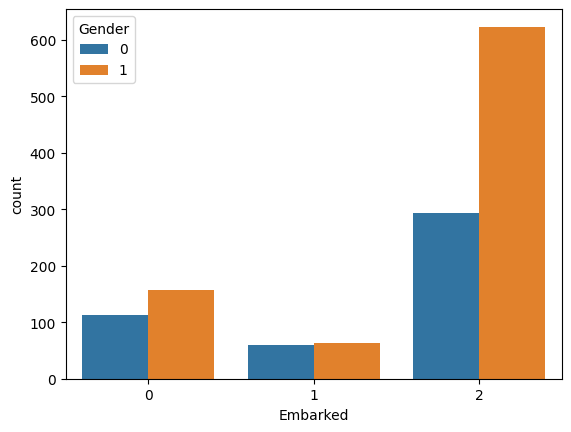

In [ ]:
sns.countplot(data=df_cleaned,x='Pclass',hue='Embarked')
plt.show()

In [ ]:
sns.countplot(data=df_cleaned,x='Embarked',hue='Pclass')
plt.show()

####ㄴ 생존여부와 호칭의 관계

In [ ]:
# 탑승객의 호칭 분포 분석
'''
### title 컬럼 ==> Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4
'''
sns.countplot(df_cleaned,x='title')
plt.show()

# 호칭의 분포 비율 추출
print(f'탑승객의 호칭 분포비율 : \n{df_cleaned.title.value_counts(normalize=True)}\n')

In [ ]:
# 'Survived' 컬럼과 'title' 컬럼의 관계 확인(1)
'''
### title 컬럼 ==> Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4
'''
sns.countplot(df_cleaned,x='Survived',hue='title')
plt.show()

In [ ]:
# 생존여부와 호칭별 분포
'''
전체 탑승객의 호칭 분포비율 :
2    0.578304
1    0.198625
3    0.150497
0    0.046600
4    0.025974
Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4
'''
# 대상 : 사망자
cond = df_cleaned.loc[:,'Survived']==0
# 사망자의 호칭별 빈도수/비율
print(f'사망자의 호칭별 빈도수 :\n{df_cleaned.loc[cond,"title"].value_counts()}\n')
print(f'사망자의 호칭별 비율 :\n{df_cleaned.loc[cond,"title"].value_counts(normalize=True)}\n')
# 대상 : 생존자
# 생존자의 호칭별 빈도수/비율
print(f'생존자의 호칭별 빈도수 :\n{df_cleaned.loc[~cond,"title"].value_counts()}\n')
print(f'생존자의 호칭별 비율 :\n{df_cleaned.loc[~cond,"title"].value_counts(normalize=True)}\n')


####ㄴ 생존여부와 가족인원수의 관계

In [ ]:
# 탑승객의 가족인원수 분포 분석
# 시각화
df_cleaned.num_family.value_counts() ### <-- 9가지 경우의 수밖에 없으므로 countplot으로 보자.
sns.countplot(df_cleaned,x='num_family')
plt.show()

# 동반한 가족인원수의 비율 확인
print(f'동반한 가족인원수의 비율 :\n{df_cleaned.num_family.value_counts(normalize=True)}\n')

In [ ]:
# 탑승객의 가족인원수 분포 분석
# 시각화
df_cleaned.num_family.value_counts() ### <-- 9가지 경우의 수밖에 없으므로 countplot으로 보자.
sns.countplot(df_cleaned,x='Survived',hue='num_family')
plt.show()

# 통계수치
cond = df_cleaned.loc[:,'Survived']==0
print(f'사망자의 가족인원수 분포비율 :\n{df_cleaned.loc[cond,"num_family"].value_counts(normalize=True)}\n')
print(f'생존자의 가족인원수 분포비율 :\n{df_cleaned.loc[~cond,"num_family"].value_counts(normalize=True)}\n')

####ㄴ 생존여부와 독신여부와의 관계

In [ ]:
# 탑승객에 대한 독신여부 분석

# 시각화
sns.countplot(df_cleaned,x='alone')
plt.show()

# 통계분석
print(f'탑승객의 독신여부 비율 :\n{df_cleaned.loc[:,"alone"].value_counts(normalize=True)}\n')

In [ ]:
# 'Survived' 컬럼과 'alone' 컬럼의 관계 분석(1)
sns.countplot(df_cleaned,x='Survived',hue='alone')
plt.show()

cond = df_cleaned.loc[:,'Survived']==0
print(f'사망자의 독신여부 비율 :\n{df_cleaned.loc[cond,"alone"].value_counts(normalize=True,ascending=True)}\n')
print(f'생존자의 독신여부 비율 :\n{df_cleaned.loc[~cond,"alone"].value_counts(normalize=True)}\n')

df_al = pd.concat([df_cleaned.loc[cond,"alone"].value_counts(normalize=True,ascending=True),
                   df_cleaned.loc[~cond,"alone"].value_counts(normalize=True)],
                  axis=1)
df_al.columns = ['사망자의 독신여부비율','생존자의 독신여부비율']
df_al.index = ['가족동반자','독신']
df_al

####ㄴ 사망자 분석

In [ ]:
# 사망률을 높일 수 있는 조건

cond_tot = (df_cleaned.loc[:,'Embarked']==2) &\
            (df_cleaned.loc[:,'Pclass']==3) &\
            (df_cleaned.loc[:,'Age2']==2) &\
            (df_cleaned.loc[:,"Gender"]==1)

            #  (df_cleaned.loc[:,"title"]==2)
            # (df_cleaned.loc[:,"num_family"]==0) &\

print(f'cond_tot의 사망률 :\n{df_cleaned.loc[cond_tot,"Survived"].value_counts(normalize=True, ascending=True)}\n')
print(f'Gender=0의 생존률 :\n{df_cleaned.loc[df_cleaned.loc[:,"Gender"]==0,"Survived"].value_counts(normalize=True, ascending=True)}\n')
print(f'Pclass=3의 생존률 :\n{df_cleaned.loc[df_cleaned.loc[:,"Pclass"]==3,"Survived"].value_counts(normalize=True, ascending=True)}\n')
print(f'Age2=2의 생존률 :\n{df_cleaned.loc[df_cleaned.loc[:,"Age2"]==2,"Survived"].value_counts(normalize=True, ascending=True)}\n')
print(f'Embarked=2의 생존률 :\n{df_cleaned.loc[df_cleaned.loc[:,"Embarked"]==2,"Survived"].value_counts(normalize=True, ascending=True)}\n')
print(f'num_family=0의 생존률 :\n{df_cleaned.loc[df_cleaned.loc[:,"num_family"]==0,"Survived"].value_counts(normalize=True, ascending=True)}\n')
print(f'title=2의 생존률 :\n{df_cleaned.loc[df_cleaned.loc[:,"title"]==2,"Survived"].value_counts(normalize=True, ascending=True)}\n')

df_tot = pd.concat([df_cleaned.loc[cond1,"Survived"].value_counts(normalize=True, ascending=False),
                    df_cleaned.loc[df_cleaned.loc[:,"Gender"]==0,"Survived"].value_counts(normalize=True, ascending=False),
                    df_cleaned.loc[df_cleaned.loc[:,"Pclass"]==3,"Survived"].value_counts(normalize=True, ascending=False),
                    df_cleaned.loc[df_cleaned.loc[:,"Age2"]==2,"Survived"].value_counts(normalize=True, ascending=False),
                    df_cleaned.loc[df_cleaned.loc[:,"Embarked"]==2,"Survived"].value_counts(normalize=True, ascending=False),
                    df_cleaned.loc[df_cleaned.loc[:,"num_family"]==0,"Survived"].value_counts(normalize=True, ascending=False),
                    df_cleaned.loc[df_cleaned.loc[:,"title"]==2,"Survived"].value_counts(normalize=True, ascending=False)],
                   axis=1)
df_tot.columns = ['cond_tot','Gender=0','Pclass=3','Age=20대','Embarked=2','num_family=0','title=2']
df_tot.index = ['사망자','생존자']
df_tot

In [ ]:
# 사망률 계산

# 사망자의 수 추출
df_dead = cleaned_df.loc[cond_tot,:]
num_dead = len(df_dead.index)

# 전체 데이터의 수 추출
df_dead = cleaned_df.loc[cond_tot,:]
num_dead = len(df_dead.index)
